In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

import joblib

# 1. Importa as Bases de dados do treino e do teste ADML43_Dataset_1

# 1.1. Importa as Base de dados do treino

In [35]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_cv = pd.read_csv('X_cv.csv')
y_cv = pd.read_csv('y_cv.csv')

# 1.2. Importa a Base de dados do teste ADML43_Dataset_1

In [37]:
# Carrega a base de testes ADML43_Dataset_1
base_teste = pd.read_csv('dataset1_teste.csv')  

# Separa as características e o alvo da base de testes ADML43_Dataset_1
X_teste = base_teste.drop(columns=['CLASSI_FIN_BINARIO'])
y_teste = base_teste['CLASSI_FIN_BINARIO']

In [38]:
# Inclui colunas que faltam no conjunto de teste com valor NaN
for coluna in X_train.columns:
    if coluna not in X_teste.columns:
        X_teste[coluna] = np.nan

In [39]:
# Remove colunas que não estão na base de treino do conjunto de teste ADML43_Dataset_1
X_teste = X_teste[X_train.columns]

In [40]:
# Remove colunas com todos os valores nulos
#X_teste = X_teste.dropna(axis=1, how='all')

In [41]:
# Remove colunas que não estão na base de teste ADML43_Dataset_1 do conjunto de treino
#X_train = X_train[X_teste.columns]

In [42]:
# Prenche valores nulos no conjunto de teste ADML43_Dataset_1
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

X_teste = pd.DataFrame(imputer.transform(X_teste), columns=X_teste.columns)

# 2. Algoritmos

# 2.1. K-Nearest Neighbors (KNN)

Acurácia 0.5977537286285922
Precisão: 0.2988768643142961
Recall: 0.5
F1-score: 0.37412131664475295


C:\Users\leand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     65729
         1.0       0.00      0.00      0.00     44231

    accuracy                           0.60    109960
   macro avg       0.30      0.50      0.37    109960
weighted avg       0.36      0.60      0.45    109960



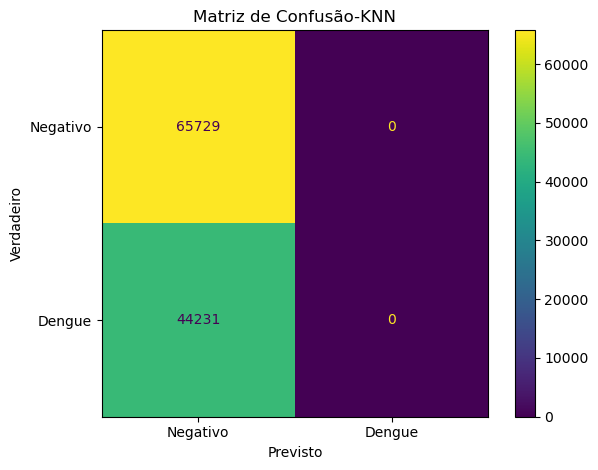

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#carrega o modelo KNN treinado
knn = joblib.load('knn_model.pkl')


# Faz previsões no conjunto de teste ADML43_Dataset_1
knn_pred = knn.predict(X_teste)

# Avaliação do modelo KNN
acurácia_knn = accuracy_score(y_teste, knn_pred)
p_knn = precision_score(y_teste, knn_pred, average='macro', zero_division=0)
r_knn = recall_score(y_teste, knn_pred, average='macro')
f1_knn = f1_score(y_teste, knn_pred, average='macro', zero_division=0)

print("Acurácia", acurácia_knn)
print("Precisão:", p_knn)
print("Recall:", r_knn)
print("F1-score:", f1_knn)

# Calcula a matriz de confusão KNN
cmKNN = confusion_matrix(y_teste, knn_pred)

# Define rótulos para os eixos
labels = ['Negativo', 'Dengue']

ConfusionMatrixDisplay(cmKNN, display_labels=labels).plot(values_format='d')
plt.grid(False)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão-KNN")
plt.tight_layout()

# Printando as métricas de precision, recall e f1-score
print(classification_report(y_teste, knn_pred))

# 2.2. Árvore de Decisão

Acurácia 0.5977537286285922
Precisão: 0.2988768643142961
Recall: 0.5
F1-score: 0.37412131664475295


C:\Users\leand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     65729
         1.0       0.00      0.00      0.00     44231

    accuracy                           0.60    109960
   macro avg       0.30      0.50      0.37    109960
weighted avg       0.36      0.60      0.45    109960



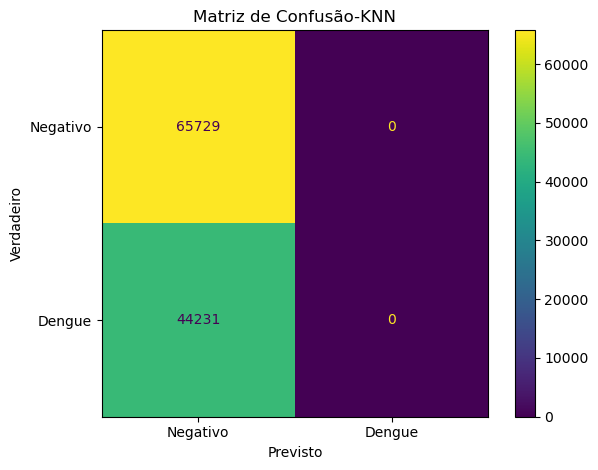

In [47]:
#carrega o modelo clfArvore treinado
clfArvore = joblib.load('clfArvore_model.pkl')


# Faz previsões no conjunto de teste ADML43_Dataset_1
clfArvore_pred = clfArvore.predict(X_teste)

# Avaliação do modelo clfArvore
acurácia_clfArvore = accuracy_score(y_teste, clfArvore_pred)
p_clfArvore = precision_score(y_teste, clfArvore_pred, average='macro', zero_division=0)
r_clfArvore = recall_score(y_teste, clfArvore_pred, average='macro')
f1_clfArvore = f1_score(y_teste, clfArvore_pred, average='macro', zero_division=0)

print("Acurácia", acurácia_clfArvore)
print("Precisão:", p_clfArvore)
print("Recall:", r_clfArvore)
print("F1-score:", f1_clfArvore)

# Calcula a matriz de confusão clfArvore
cmclfArvore = confusion_matrix(y_teste, clfArvore_pred)

# Define rótulos para os eixos
labels = ['Negativo', 'Dengue']

ConfusionMatrixDisplay(cmclfArvore, display_labels=labels).plot(values_format='d')
plt.grid(False)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão-KNN")
plt.tight_layout()

# Printando as métricas de precision, recall e f1-score
print(classification_report(y_teste, clfArvore_pred))

# 2.3. Rede Neural (Multilayer Perceptron - MLP)

# 2.4. Logistic Regression (Regressão Logística)

# 2.5. Random Forest (Floresta Aleatória)

# 3. Importa a Base de dados do treino e do teste ADML43_Dataset_2

In [52]:
# Importa as Base de dados do treino
X_train2 = pd.read_csv('X_train.csv')
y_train2 = pd.read_csv('y_train.csv')
X_cv2 = pd.read_csv('X_cv.csv')
y_cv2 = pd.read_csv('y_cv.csv')

In [53]:
# Carrega a base de testes ADML43_Dataset_2
base_teste2 = pd.read_csv('dataset2_teste.csv')  

# Separa as características e o alvo da base de testes ADML43_Dataset_2
X_teste2 = base_teste2.drop(columns=['CLASSI_FIN_BINARIO'])
y_teste2 = base_teste2['CLASSI_FIN_BINARIO']

In [54]:
# Inclui colunas que faltam no conjunto de teste com valor NaN
for coluna in X_train2.columns:
    if coluna not in X_teste2.columns:
        X_teste2[coluna] = np.nan

In [55]:
# Remove colunas que não estão na base de treino do conjunto de teste ADML43_Dataset_2
X_teste2 = X_teste2[X_train2.columns]

In [56]:
# Prenche valores nulos no conjunto de teste ADML43_Dataset_2

imputer2 = SimpleImputer(strategy='mean')
imputer2.fit(X_train2)

X_teste2 = pd.DataFrame(imputer2.transform(X_teste2), columns=X_teste2.columns)

# 4. Algoritmos com o teste ADML43_Dataset_2

# 4.1. K-Nearest Neighbors (KNN) com o teste ADML43_Dataset_2

Acurácia 0.6462168061113132
Precisão: 0.6443841319292467
Recall: 0.6500663737298662
F1-score: 0.6420881721220923
              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68     65729
         1.0       0.55      0.67      0.60     44231

    accuracy                           0.65    109960
   macro avg       0.64      0.65      0.64    109960
weighted avg       0.66      0.65      0.65    109960



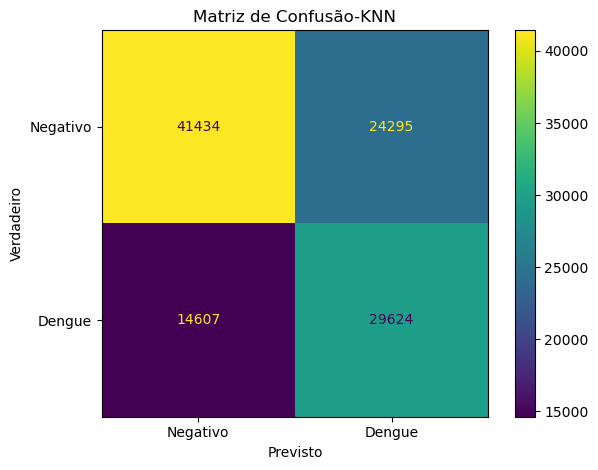

In [59]:
#carrega o modelo KNN treinado
knn2 = joblib.load('knn_model.pkl')


# Faz previsões no conjunto de teste ADML43_Dataset_2
knn_pred2 = knn2.predict(X_teste2)

# Avaliação do modelo KNN
acurácia_knn2 = accuracy_score(y_teste2, knn_pred2)
p_knn2 = precision_score(y_teste2, knn_pred2, average='macro', zero_division=0)
r_knn2 = recall_score(y_teste2, knn_pred2, average='macro')
f1_knn2 = f1_score(y_teste2, knn_pred2, average='macro', zero_division=0)

print("Acurácia", acurácia_knn2)
print("Precisão:", p_knn2)
print("Recall:", r_knn2)
print("F1-score:", f1_knn2)

# Calcula a matriz de confusão KNN
cmKNN2 = confusion_matrix(y_teste2, knn_pred2)

# Define rótulos para os eixos
labels = ['Negativo', 'Dengue']

ConfusionMatrixDisplay(cmKNN2, display_labels=labels).plot(values_format='d')
plt.grid(False)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão-KNN")
plt.tight_layout()

# Printando as métricas de precision, recall e f1-score
print(classification_report(y_teste2, knn_pred2))

# 4.2. Árvore de Decisão com o teste ADML43_Dataset_2

Acurácia 0.6065023644961804
Precisão: 0.7178365892979629
Recall: 0.5117731689204524
F1-score: 0.4022155045604461
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     65729
         1.0       0.83      0.03      0.05     44231

    accuracy                           0.61    109960
   macro avg       0.72      0.51      0.40    109960
weighted avg       0.70      0.61      0.47    109960



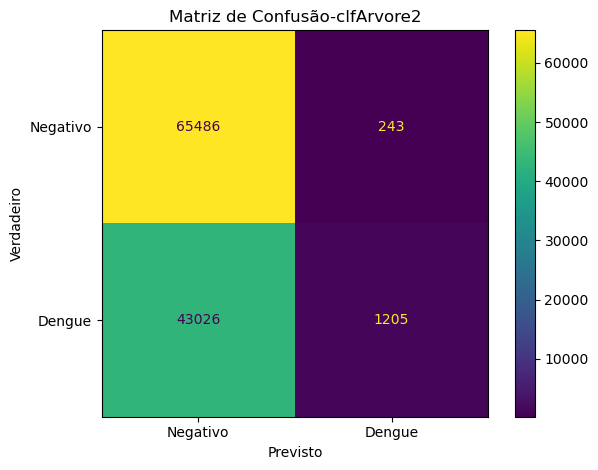

In [61]:
#carrega o modelo clfArvore treinado
clfArvore2 = joblib.load('clfArvore_model.pkl')


# Faz previsões no conjunto de teste ADML43_Dataset_1
clfArvore_pred2 = clfArvore2.predict(X_teste2)

# Avaliação do modelo clfArvore
acurácia_clfArvore2 = accuracy_score(y_teste2, clfArvore_pred2)
p_clfArvore2 = precision_score(y_teste2, clfArvore_pred2, average='macro', zero_division=0)
r_clfArvore2 = recall_score(y_teste2, clfArvore_pred2, average='macro')
f1_clfArvore2 = f1_score(y_teste2, clfArvore_pred2, average='macro', zero_division=0)

print("Acurácia", acurácia_clfArvore2)
print("Precisão:", p_clfArvore2)
print("Recall:", r_clfArvore2)
print("F1-score:", f1_clfArvore2)

# Calcula a matriz de confusão clfArvore
cmclfArvore2 = confusion_matrix(y_teste2, clfArvore_pred2)

# Define rótulos para os eixos
labels = ['Negativo', 'Dengue']

ConfusionMatrixDisplay(cmclfArvore2, display_labels=labels).plot(values_format='d')
plt.grid(False)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão-clfArvore2")
plt.tight_layout()

# Printando as métricas de precision, recall e f1-score
print(classification_report(y_teste2, clfArvore_pred2))